In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data set

In [2]:
dataset = pd.read_csv('global_co2.csv')
dataset

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [3]:
#as data has NAN values/missing values

In [4]:
dataset=dataset.dropna()
dataset

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
199,1950,1630,97,423,1070,18,23,0.64
200,1951,1767,115,479,1129,20,24,0.69
201,1952,1795,124,504,1119,22,26,0.68
202,1953,1841,131,533,1125,24,27,0.69
203,1954,1865,138,557,1116,27,27,0.69
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


# Data pre- processing

In [5]:
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:,7:8].values

In [6]:
X

array([[1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010]], dtype=int64)

In [7]:
y

array([[0.64],
       [0.69],
       [0.68],
       [0.69],
       [0.69],
       [0.74],
       [0.77],
       [0.79],
       [0.8 ],
       [0.83],
       [0.85],
       [0.84],
       [0.86],
       [0.88],
       [0.92],
       [0.94],
       [0.97],
       [0.98],
       [1.01],
       [1.05],
       [1.1 ],
       [1.12],
       [1.14],
       [1.18],
       [1.16],
       [1.13],
       [1.18],
       [1.19],
       [1.19],
       [1.23],
       [1.2 ],
       [1.14],
       [1.11],
       [1.09],
       [1.11],
       [1.12],
       [1.14],
       [1.15],
       [1.17],
       [1.17],
       [1.16],
       [1.16],
       [1.13],
       [1.11],
       [1.11],
       [1.12],
       [1.13],
       [1.13],
       [1.12],
       [1.1 ],
       [1.11],
       [1.12],
       [1.12],
       [1.17],
       [1.21],
       [1.24],
       [1.27],
       [1.28],
       [1.3 ],
       [1.28],
       [1.33]])

# Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Fitting

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting

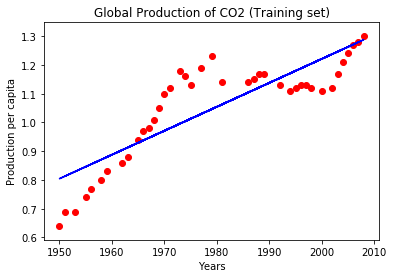

In [10]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Global Production of CO2 (Training set)')
plt.xlabel('Years')
plt.ylabel('Production per capita')
plt.show()

# apply polynomial regression

# Fitting

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Again Plotting

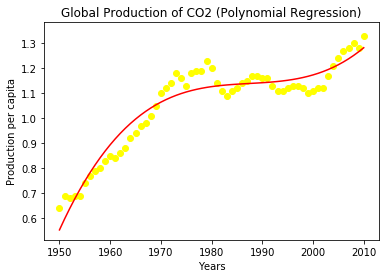

In [12]:
plt.scatter(X, y, color = 'yellow')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'red')
plt.title('Global Production of CO2 (Polynomial Regression)')
plt.xlabel('Years')
plt.ylabel('Production per capita')
plt.show()

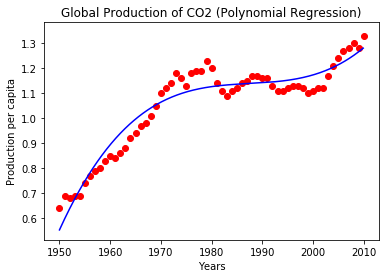

In [13]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Global Production of CO2 (Polynomial Regression)')
plt.xlabel('Years')
plt.ylabel('Production per capita')
plt.show()

# Prediction

In [14]:
y_pred = regressor.predict([[2011]])
print("Global Production of CO2 in 2011 =")
print(y_pred)

Global Production of CO2 in 2011 =
[[1.31284677]]


In [15]:
y_pred = regressor.predict([[2012]])
print("Global Production of CO2 in 2012 =")
print(y_pred)

Global Production of CO2 in 2012 =
[[1.32118188]]


In [16]:
y_pred = regressor.predict([[2013]])
print("Global Production of CO2 in 2013 =")
print(y_pred)

Global Production of CO2 in 2013 =
[[1.32951699]]
